In [2]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

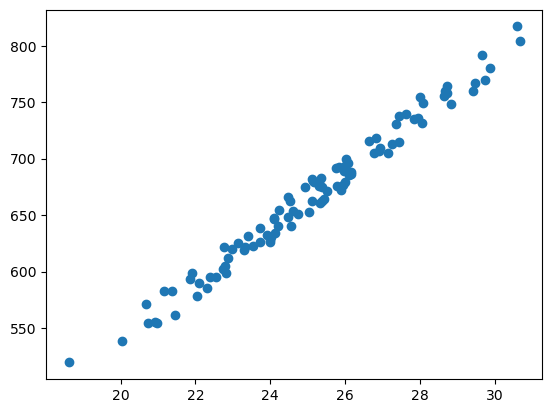

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

#Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])
plt.scatter(data['area'], data['price'])
plt.show()

In [4]:
data = (data - data.min()) / (data.max() - data.min())

In [5]:
model = K.Sequential([Dense(1, input_shape = [1,], activation=None)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2024-07-13 13:50:16.599167: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [7]:
model.fit(x=data['area'],y=data['price'], epochs=100, batch_size=32, 
          verbose=1, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 55ms/step - loss: 0.0363 - val_loss: 0.0380
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0320 - val_loss: 0.0336
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0283 - val_loss: 0.0295
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0251 - val_loss: 0.0263
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0224 - val_loss: 0.0235
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0201 - val_loss: 0.0209
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0180 - val_loss: 0.0187
Epoch 8/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0163 - val_loss: 0.0168
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0147 - val_loss: 0.0151
Epoch 10/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0134 - val_loss: 0.0138
Epoch 11/100
3/3 [=

In [9]:
y_pred = model.predict(data['area'])

4/4 [==============================] - 0s 2ms/step


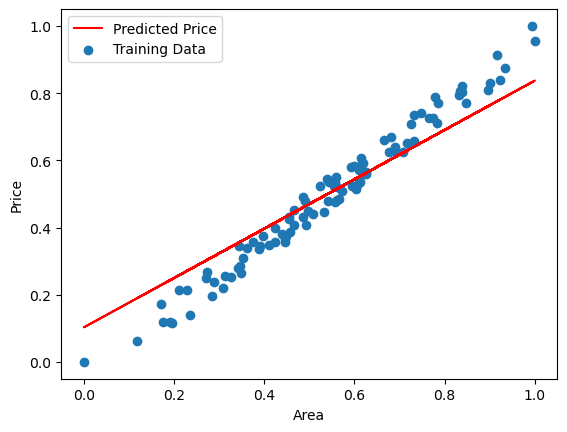

In [10]:
plt.plot(data['area'], y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

In [12]:
print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.73424214]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.10302825], dtype=float32)>]
